# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [7]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


In [8]:
 df.shape

(1973, 2)

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1) I have chosen to use the Book Review data set (bookReviewDataSet). 

2) I will be predicting whether a book review is positive or not based on the language content. The label is the Positive Review column.

3) This is a supervised learning problem because the label (Positive Review) is provided. It is a binary classification problem since the label only has two possible values: True (positive) or False (not positive).

4) The main feature is the Review content/text itself. After preprocessing (like vectorization using TF-IDF, handling negations, figuring out the optimal tokenization), each review will be converted into a set of numerical features based on word usage.

5) Being able to derive the sentiment of a review helps a company (in this case, a publishing or book company) figure out whether or not customers are pleased with a product. This helps them make adjustments to further iterate or develop their product, improve customer satisfaction, and adapt their marketing.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [13]:
print("Missing Values:")
print(df.isnull().sum())

# the results indicate that we don't have any missing values to address

Missing Values:
Review             0
Positive Review    0
dtype: int64


In [16]:
print("Label Distribution:")
print(df['Positive Review'].value_counts())

# pretty evenly distributed

Label Distribution:
False    993
True     980
Name: Positive Review, dtype: int64


In [22]:
df['Review Length'] = df['Review'].astype(str).apply(len)
print("Review Length Stats:")
print(df['Review Length'].describe())

Review Length Stats:
count     1973.000000
mean       933.336036
std       1450.187183
min         59.000000
25%        331.000000
50%        586.000000
75%       1065.000000
max      32467.000000
Name: Review Length, dtype: float64


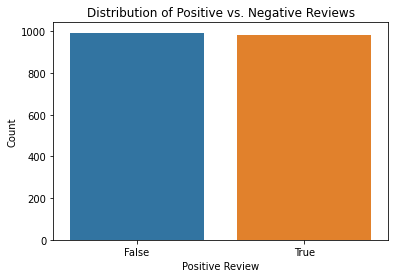

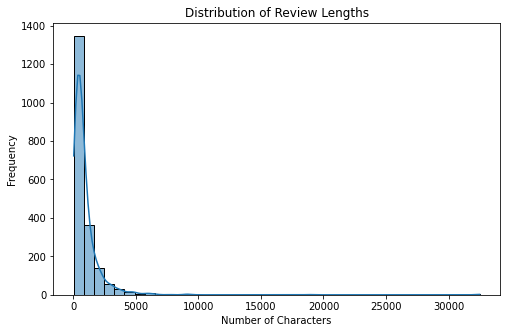

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Positive Review')
plt.title('Distribution of Positive vs. Negative Reviews')
plt.xlabel('Positive Review')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['Review Length'], bins=40, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

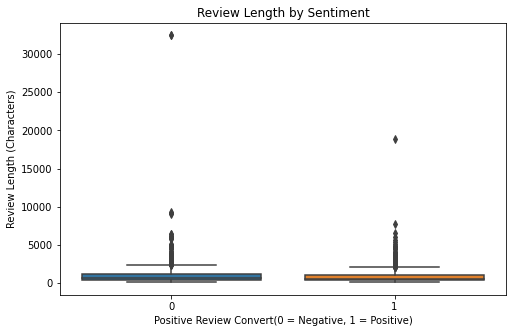

In [25]:
df['Positive Review Convert'] = df['Positive Review'].astype(int)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Positive Review Convert', y='Review Length')
plt.title('Review Length by Sentiment')
plt.xlabel('Positive Review Convert(0 = Negative, 1 = Positive)')
plt.ylabel('Review Length (Characters)')
plt.show()

# doesn't seem like there's a clear relationship between review length and sentiment

**My notes:** 

> Need to address potential missing values, such as blank reviews, which can be either removed or imputed with placeholder values depending on context.

> Text normalization (convert all characters to lowercase) and remove punctuation, special characters, and non-alphabetic tokens

> Reduce stop words like “the,” “is,” and “and" to reduce noise in the dataset

> Use lemmatization to reduce words to their base or root form

> Use TF-IDF or word embeddings to help transform raw text into a numerical format

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

> New Feature List: After exploring the dataset, I’ve added a new feature: Review Length, which captures the number of characters in each review. I’ve decided to keep the original Review text (which will be vectorized) and Review Length, as both may contribute useful signals to the model. No features were removed, but the raw text will be transformed.

> Data Preparation Techniques:
I will apply several preprocessing steps tailored for NLP:
Remove missing or blank reviews.
Normalize text (lowercase, strip punctuation/symbols).
Remove stop words to reduce noise.
Apply lemmatization to reduce words to their root form.
Use TF-IDF to convert the cleaned text into a numeric format.
Scale the Review Length feature using MinMaxScaler.

> Models Chosen:
I will be making a Logistic Regression model that will be trained using scikit-learn or Keras.

> Training & Evaluation Plan:
I’ll split the data into training and test sets (80/20). Evaluation will be done using metrics such as accuracy, precision, and recall. I’ll also visualize model performance using confusion matrices and ROC curves. Hyperparameter tuning via GridSearchCV will help optimize generalization.



## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [41]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.5 MB 17.4 MB/s            
     |████████████████████████████████| 759 kB 54.8 MB/s            
     |████████████████████████████████| 78 kB 1.6 MB/s             
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from scipy.sparse import hstack

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/codio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/codio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/codio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/codio/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [68]:
df = pd.read_csv(bookReviewDataSet_filename)

# drop blank reviews; in this case though, there are none
df.dropna(subset=["Review"], inplace=True)
df = df[df["Review"].str.strip().astype(bool)]

# add a new feature for review length (number of words)
df["Review_Length"] = df["Review"].apply(lambda x: len(x.split()))

# define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# define text cleaning function
def clean_text(text):
    text = text.lower()  # convert text to lowercase
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # remove punctuation
    tokens = word_tokenize(text)  # tokenize text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # remove stopwords and lemmatize
    return " ".join(tokens)  # return cleaned text

# apply cleaning to the review text
df["Cleaned_Review"] = df["Review"].apply(clean_text)

# convert cleaned reviews to tf-idf features
vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(df["Cleaned_Review"])

# scale the review length feature
scaler = MinMaxScaler()
length_scaled = scaler.fit_transform(df[["Review_Length"]])

# combine text features with scaled review length
X = hstack([X_text, length_scaled])

# convert label column to integers
y = df["Positive Review"].astype(int)

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.8769230769230769
Recall: 0.855
Accuracy: 0.8658227848101265


Best Params: {'C': 10}
Accuracy: 0.851
Precision: 0.851
Recall: 0.855


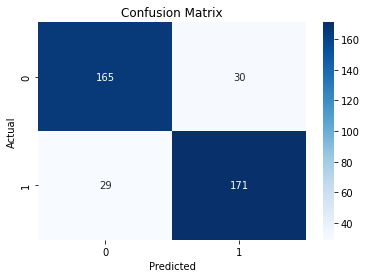

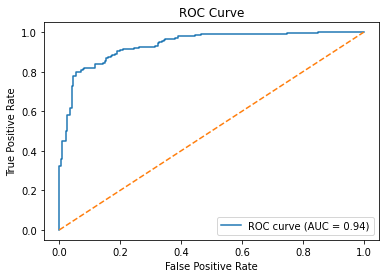

In [73]:
# define a grid of values to test for the regularization strength parameter c
param_grid = {"C": [0.01, 0.1, 1, 5, 10, 20]}

# perform grid search cross-validation using logistic regression
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

# generate predictions on the test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# calculate performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# print the best parameter and evaluation scores
print("Best Params:", grid.best_params_)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# create and display a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# compute and plot the roc curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

The logistic regression model performed well, achieving an accuracy of 85.1%, meaning it correctly classified over 85% of book reviews. Precision and recall were also balanced at 0.851 and 0.855, indicating that the model is both good at identifying true positives and avoiding false positives. The confusion matrix shows 171 true positives and 165 true negatives, with a nearly equal number of false positives (30) and false negatives (29), suggesting the model is not biased toward either class. The best result was obtained using a regularization strength of C = 10, which allows the model more flexibility by applying less penalty to large coefficients.

The ROC curve further confirms the model's strong performance, with an AUC of 0.94, indicating excellent ability to separate positive and negative reviews. This suggests that the model can maintain high performance across different classification thresholds. Overall, the model demonstrates both strong precision and generalization to unseen data. 